<a href="https://colab.research.google.com/github/anuragsingh0670/Code-Clause-internship/blob/main/PREDICTING_HOUSE_PRICES_new_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('/content/housing.csv')

In [4]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [6]:
data.dropna(inplace=True)

In [7]:
from sklearn.model_selection import train_test_split

X=data.drop('median_house_value',axis=1)
y=data['median_house_value']

In [8]:
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size =0.2)


In [9]:
train_data = x_train.join(y_train)


In [10]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
13297,-117.65,34.08,40.0,1609.0,258.0,624.0,242.0,5.4689,INLAND,158200.0
19950,-119.34,36.23,12.0,4965.0,872.0,2191.0,804.0,3.5611,INLAND,90200.0
7126,-118.09,34.03,27.0,3797.0,597.0,2043.0,614.0,5.5000,<1H OCEAN,276800.0
3549,-118.63,34.22,18.0,1376.0,225.0,670.0,205.0,6.5146,<1H OCEAN,277600.0
384,-122.16,37.74,44.0,1097.0,239.0,609.0,215.0,2.0227,NEAR BAY,103100.0
...,...,...,...,...,...,...,...,...,...,...
10579,-117.69,33.64,16.0,2592.0,372.0,1279.0,383.0,6.9741,<1H OCEAN,262000.0
13906,-116.47,34.07,22.0,5473.0,1234.0,2581.0,1098.0,1.9375,INLAND,65300.0
16244,-121.28,37.99,42.0,495.0,116.0,284.0,97.0,2.8854,INLAND,55700.0
7757,-118.13,33.91,35.0,561.0,104.0,261.0,105.0,4.9375,<1H OCEAN,183800.0


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

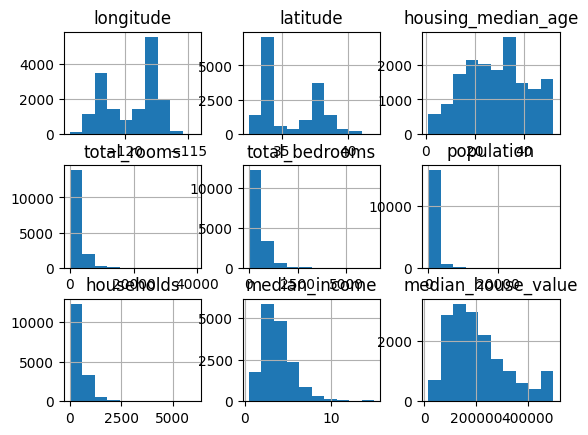

In [11]:
train_data.hist()

<Axes: >

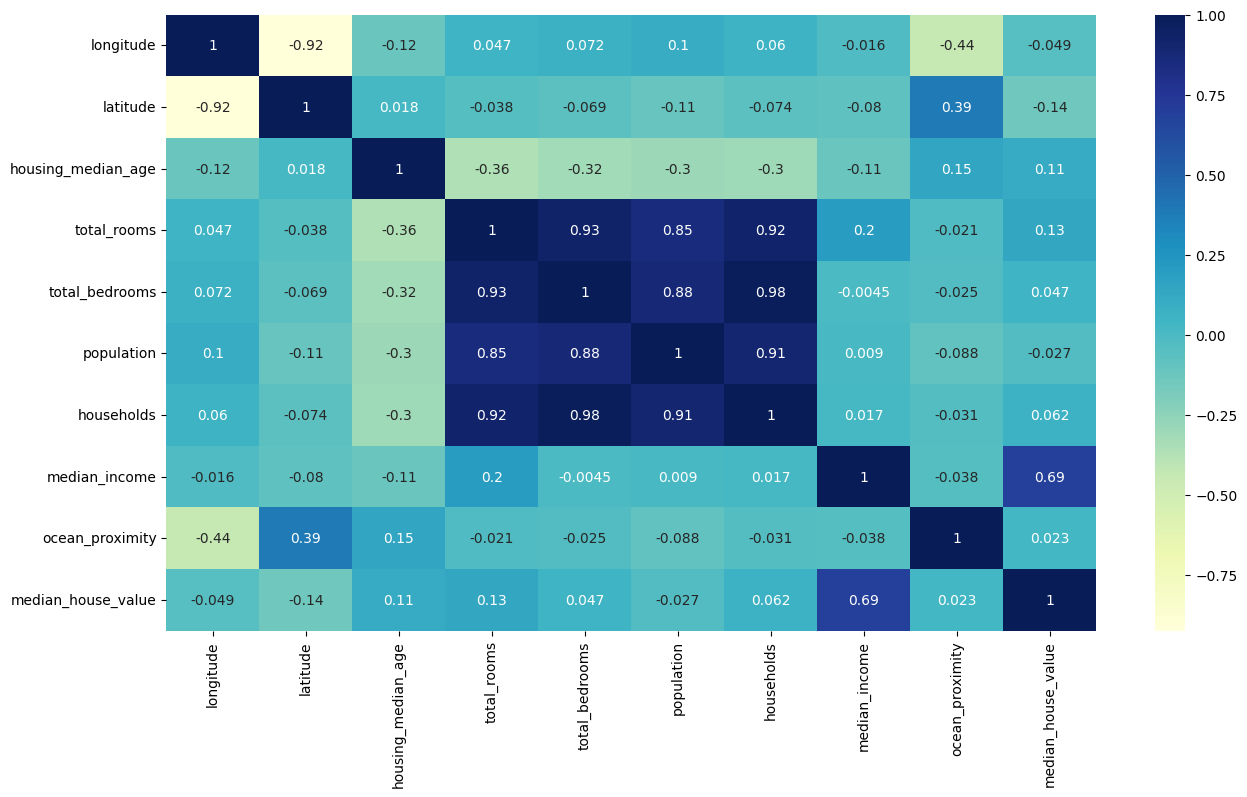

In [12]:
# Convert the '<1H OCEAN' values to a numerical representation.
# Here, we'll use 0 for '<1H OCEAN' but you can choose a more suitable mapping based on your data.
train_data['ocean_proximity'] = train_data['ocean_proximity'].replace('<1H OCEAN', 0)

# Convert other non-numeric values in the 'ocean_proximity' column to numerical representations.
train_data['ocean_proximity'] = train_data['ocean_proximity'].replace('INLAND', 1)
train_data['ocean_proximity'] = train_data['ocean_proximity'].replace('NEAR OCEAN', 2)
train_data['ocean_proximity'] = train_data['ocean_proximity'].replace('NEAR BAY', 3)
train_data['ocean_proximity'] = train_data['ocean_proximity'].replace('ISLAND', 4)

# Now you can create the heatmap
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot= True, cmap="YlGnBu")


In [13]:
train_data['total_rooms'] = np.log(train_data['total_rooms'] + 1)
train_data['total_bedrooms'] = np.log(train_data['total_bedrooms'] + 1)
train_data['population'] = np.log(train_data['population'] + 1)
train_data['households'] = np.log(train_data['households'] + 1)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'ocean_proximity'}>],
       [<Axes: title={'center': 'median_house_value'}>, <Axes: >,
        <Axes: >]], dtype=object)

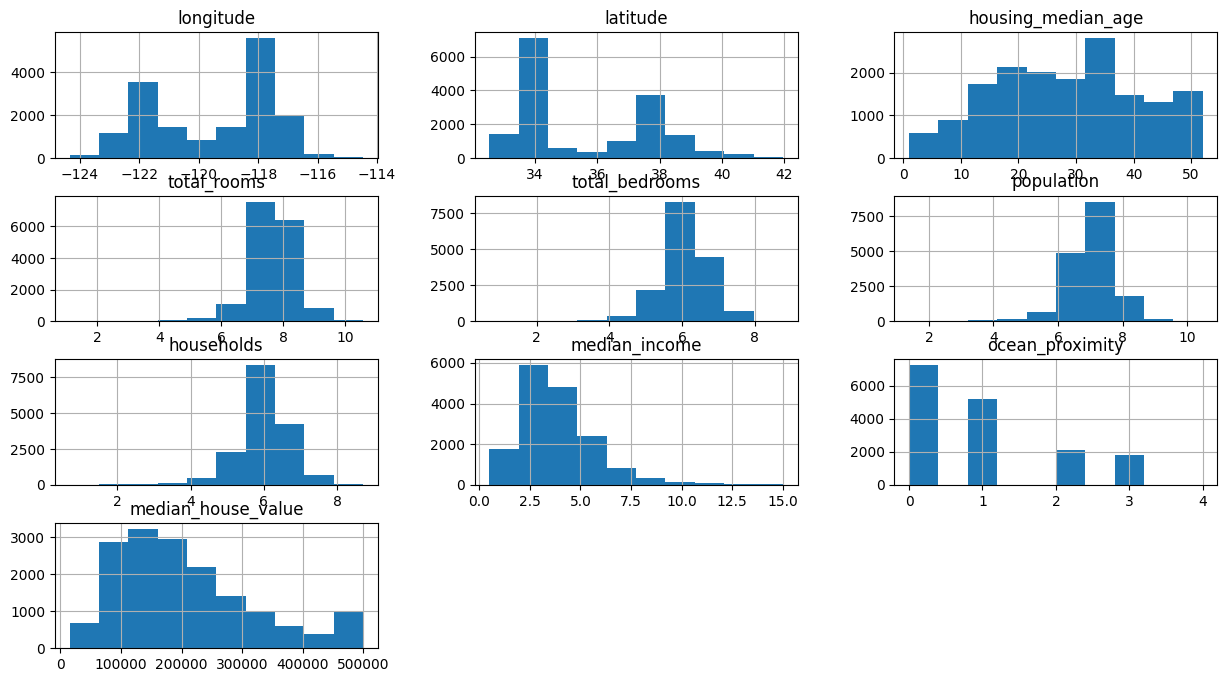

In [14]:
train_data.hist(figsize=(15,8))

In [15]:
train_data = train_data.join(pd.get_dummies(train_data.ocean_proximity)).drop('ocean_proximity',axis=1)

<Axes: >

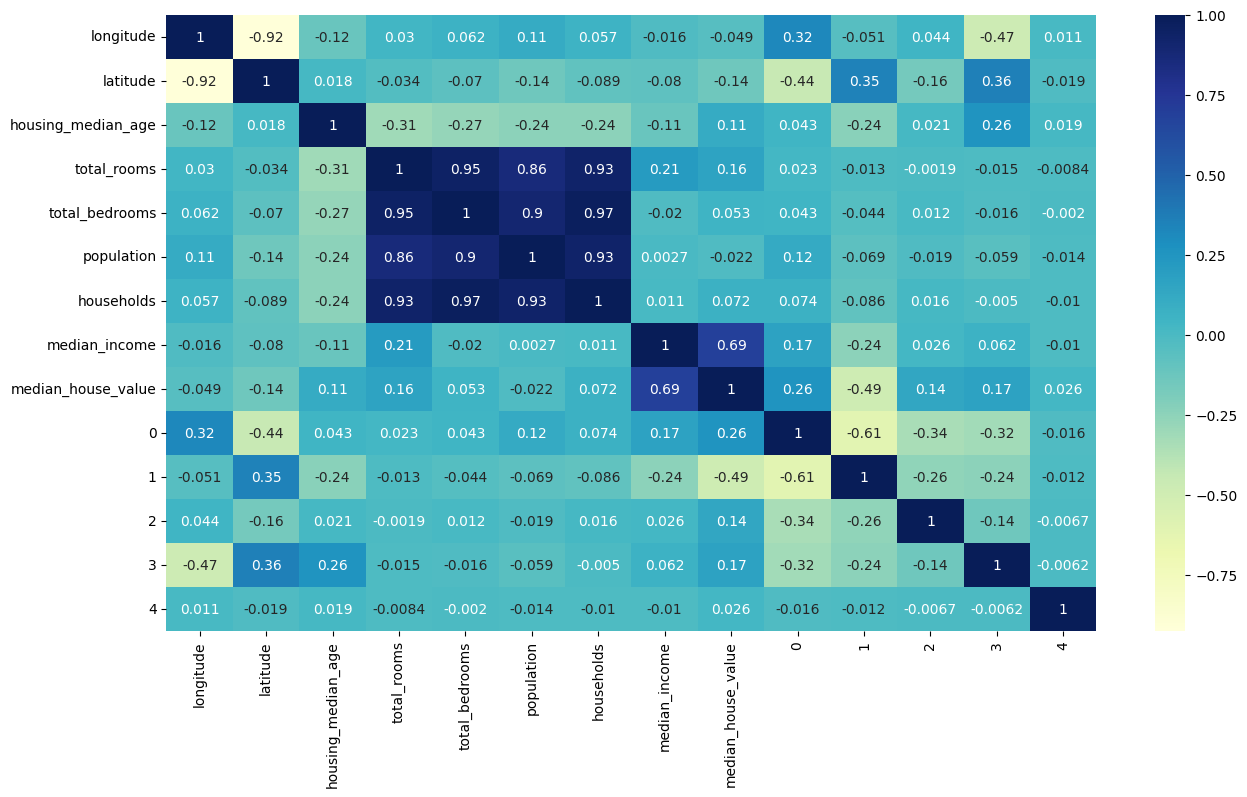

In [16]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot= True, cmap="YlGnBu")

<Axes: xlabel='latitude', ylabel='longitude'>

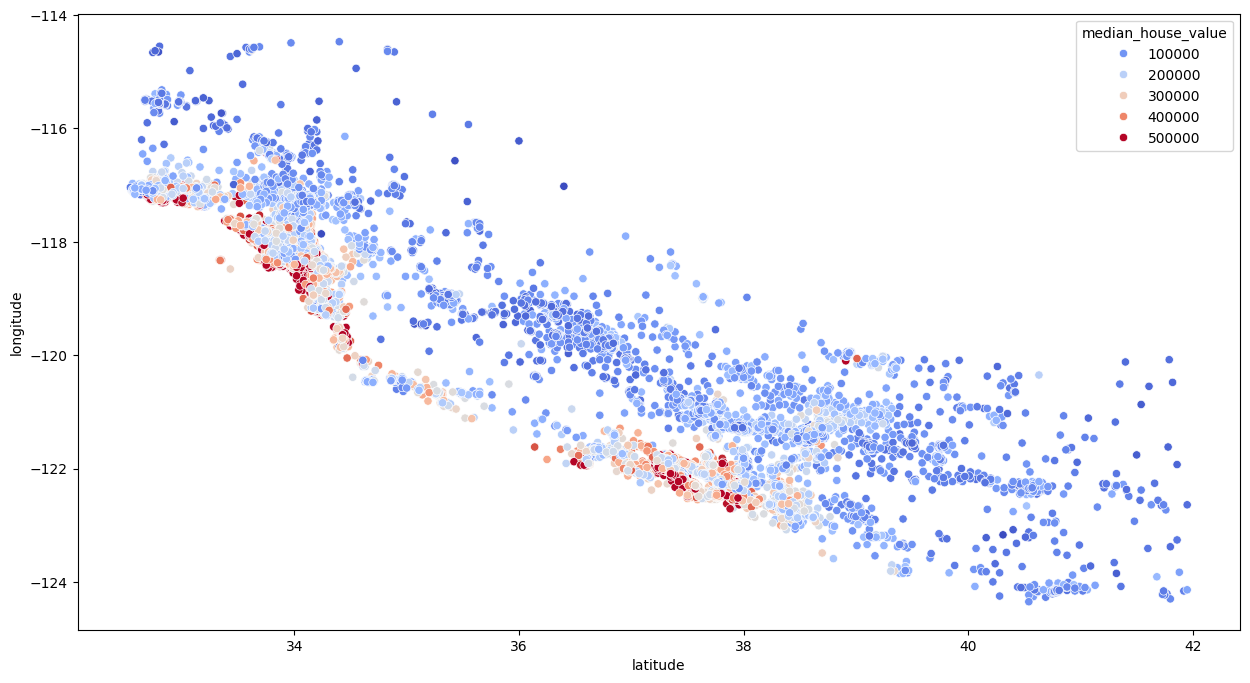

In [17]:
plt.figure(figsize=(15,8))
sns.scatterplot(x='latitude',y='longitude',data=train_data,hue='median_house_value', palette='coolwarm')

In [18]:
train_data['bedroom_ratio'] = train_data['total_bedrooms'] / train_data['total_rooms']
train_data['household_rooms'] = train_data['total_rooms'] / train_data['households']

<Axes: >

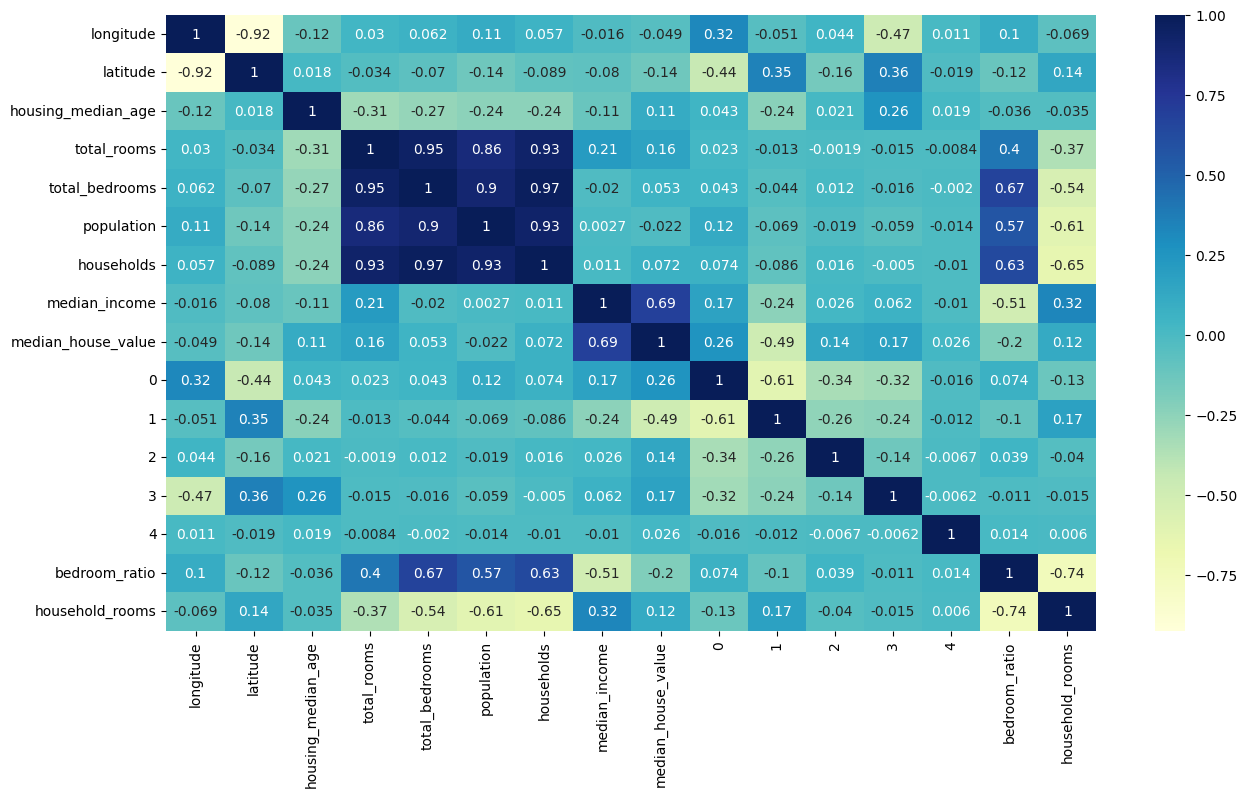

In [19]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot= True, cmap="YlGnBu")

In [35]:
from sklearn.linear_model import LinearRegression


scaler = StandardScaler()

x_train, y_train = train_data.drop('median_house_value',axis=1), train_data['median_house_value']


# Convert all column names to strings
x_train.columns = x_train.columns.astype(str)

reg = LinearRegression()

reg.fit(x_train,y_train)


LinearRegression()

In [21]:
test_data = x_test.join(y_test)

test_data['total_rooms'] = np.log(test_data['total_rooms'] + 1)
test_data['total_bedrooms'] = np.log(test_data['total_bedrooms'] + 1)
test_data['population'] = np.log(test_data['population'] + 1)
test_data['households'] = np.log(test_data['households'] + 1)

test_data = test_data.join(pd.get_dummies(test_data.ocean_proximity)).drop('ocean_proximity',axis=1)

test_data['bedroom_ratio'] = test_data['total_bedrooms'] / test_data['total_rooms']
test_data['household_rooms'] = test_data['total_rooms'] / test_data['households']

In [22]:
x_test, y_test = test_data.drop('median_house_value',axis=1), test_data['median_house_value']

In [ ]:
x_test_s= scaler.transform(x_test)

In [36]:
# Convert all column names to strings
x_test.columns = x_test.columns.astype(str)

# Get missing columns in x_test
missing_cols = set(x_train.columns) - set(x_test.columns)

# Add a missing column in x_test
for c in missing_cols:
    x_test[c] = 0

# Ensure the order of column in x_test is the same as in x_train
x_test = x_test[x_train.columns]

reg.score(x_test, y_test)

0.5866914752413117

In [37]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor()

forest.fit(x_train,y_train)

RandomForestRegressor()

In [38]:
forest.score(x_test, y_test)

0.6119374762665228

In [52]:
from sklearn.model_selection import GridSearchCV

forest = RandomForestRegressor()
param_grid = {
    "n_estimators": [100, 200, 300],
    "min_samples_split": [2, 4], "max_depth": [None, 4, 8]
}

grid_search = GridSearchCV(
    forest, param_grid, cv=5, scoring="neg_mean_squared_error", return_train_score = True)

grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [None, 4, 8], 'min_samples_split': [2, 4],
                         'n_estimators': [100, 200, 300]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [53]:
 grid_search.best_estimator_

RandomForestRegressor(min_samples_split=4, n_estimators=300)

In [54]:
grid_search.best_estimator_.score(x_test, y_test)

0.6156114612256061